In [1]:
#@title Libs
import numpy as np
from random import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#@title V0.0
'''
tiempoAsignadoLlegadaUsuario | tiempoAsignadoUsuarioEnCajero | tiempoCalculadoLlegadaUsuario | tiempoCalculadoSalidaCajero | tiempoCalculadoEsperaUsuario | tiempoCalculadoEsperaCajero    
'''
def cola(tiemposUsuarioEnCajero: list, tiemposLLegadaUsuario: list):
  
  tiempos = []
  TiempoServicio = 1440

  linea = [tiemposLLegadaUsuario[0], tiemposUsuarioEnCajero[0],  tiemposLLegadaUsuario[0], tiemposLLegadaUsuario[0] + tiemposUsuarioEnCajero[0], 0.00, 0.00,'none']
  tiempos.append(linea)

  for i in range(1, len(tiemposUsuarioEnCajero)):
    

    usuarioAnterior = tiempos[i-1]

    if tiemposUsuarioEnCajero[i-1] >= tiemposLLegadaUsuario[i]:  

      tiempoAsignadoLlegadaUsuario = tiemposLLegadaUsuario[i]
      tiempoAsignadoUsuarioEnCajero = tiemposUsuarioEnCajero[i]
      
      tiempoCalculadoLLegadaUsuario = usuarioAnterior[2] + tiempoAsignadoLlegadaUsuario#usuarioAnterior['tiempoCalculadoLLegadaUsuario'][0] + tiempoAsignadoLlegadaUsuario
      tiempoCalculadoSalidaCajero = usuarioAnterior[3] + tiempoAsignadoUsuarioEnCajero#usuarioAnterior['tiempoCalculadoSalidaCajero'][0] + tiempoAsignadoUsuarioEnCajero
      tiempoCalculadoEsperaUsuario = usuarioAnterior[3] - tiempoCalculadoLLegadaUsuario#usuarioAnterior['tiempoCalculadoSalidaCajero'][0] - tiempoCalculadoLLegadaUsuario
      tiempoCalculadoEsperaCajero = 0.00
      
      linea = [tiempoAsignadoLlegadaUsuario, 
               tiempoAsignadoUsuarioEnCajero, 
               tiempoCalculadoLLegadaUsuario, 
               tiempoCalculadoSalidaCajero, 
               tiempoCalculadoEsperaUsuario, 
               tiempoCalculadoEsperaCajero, 
               'if']

      tiempos.append(linea)
    
    else:

      tiempoAsignadoLlegadaUsuario = tiemposLLegadaUsuario[i]
      tiempoAsignadoUsuarioEnCajero = tiemposUsuarioEnCajero[i]
      
      tiempoCalculadoLLegadaUsuario = usuarioAnterior[2] + tiempoAsignadoLlegadaUsuario#usuarioAnterior['tiempoCalculadoLLegadaUsuario'][0] + tiempoAsignadoLlegadaUsuario
      tiempoCalculadoEsperaCajero = tiempoCalculadoLLegadaUsuario - usuarioAnterior[3]#tiempoCalculadoLLegadaUsuario - usuarioAnterior['tiempoCalculadoSalidaCajero'][0]
      tiempoCalculadoSalidaCajero = tiempoCalculadoLLegadaUsuario + tiempoAsignadoUsuarioEnCajero
      tiempoCalculadoEsperaUsuario = 0.00

      linea = [tiempoAsignadoLlegadaUsuario,
               tiempoAsignadoUsuarioEnCajero,
               tiempoCalculadoLLegadaUsuario,
               tiempoCalculadoSalidaCajero,
               tiempoCalculadoEsperaUsuario,
               tiempoCalculadoEsperaCajero,
               'else']

      tiempos.append(linea)

  return tiempos

In [ ]:
#@title V0.1
def cola(tiemposUsuarioEnCajero: list, tiemposLLegadaUsuario: list) -> list:
  
  tiempos = []
  TiempoServicio = 1440

  linea = [tiemposLLegadaUsuario[0], tiemposUsuarioEnCajero[0],  tiemposLLegadaUsuario[0], tiemposLLegadaUsuario[0] + tiemposUsuarioEnCajero[0], 0.00, 0.00,'none']
  tiempos.append(linea)

  for i in range(1, len(tiemposUsuarioEnCajero)):
    
    usuarioAnterior = tiempos[i-1]

    tiempoAsignadoLlegadaUsuario = tiemposLLegadaUsuario[i]
    tiempoAsignadoUsuarioEnCajero = tiemposUsuarioEnCajero[i]

    tiempoCalculadoLLegadaUsuario = usuarioAnterior[2] + tiempoAsignadoLlegadaUsuario

    if tiemposUsuarioEnCajero[i-1] >= tiemposLLegadaUsuario[i]:  
    
      condicional = 'if'

      tiempoCalculadoSalidaCajero = usuarioAnterior[3] + tiempoAsignadoUsuarioEnCajero
      tiempoCalculadoEsperaUsuario = usuarioAnterior[3] - tiempoCalculadoLLegadaUsuario
      tiempoCalculadoEsperaCajero = 0.00

    else:

      condicional = 'else'

      tiempoCalculadoEsperaCajero = tiempoCalculadoLLegadaUsuario - usuarioAnterior[3]
      tiempoCalculadoSalidaCajero = tiempoCalculadoLLegadaUsuario + tiempoAsignadoUsuarioEnCajero
      tiempoCalculadoEsperaUsuario = 0.00

      

    linea = [tiempoAsignadoLlegadaUsuario,
             tiempoAsignadoUsuarioEnCajero,
             tiempoCalculadoLLegadaUsuario,
             tiempoCalculadoSalidaCajero,
             tiempoCalculadoEsperaUsuario,
             tiempoCalculadoEsperaCajero,
             condicional]

    tiempos.append(linea)

  return tiempos

In [255]:
#@title V1 funcional
def cola(tiemposUsuarioEnCajero: list, tiemposLLegadaUsuario: list) -> list:
  
  tiempos = []
  TiempoServicio = 1440 # 24 horas

  '''
  'tiempo Asignado Llegada Usuario',
  'tiempo Asignado Usuario EnCajero',
  'tiempo Llegada Usuario',
  'tiempo Usuario sale Cajero',
  'tiempo Usario Espera Cajero',
  'tiempo Cajero Espera Usuario',
  'tiempo total del usuario'
  '''

  linea = [tiemposLLegadaUsuario[0], 
           tiemposUsuarioEnCajero[0],  
           tiemposLLegadaUsuario[0], 
           tiemposLLegadaUsuario[0] + tiemposUsuarioEnCajero[0], 
           0.00, 
           0.00,
           tiemposUsuarioEnCajero[0]]

  tiempos.append(linea)

  for i in range(1, len(tiemposUsuarioEnCajero)):
    
    usuarioAnterior = tiempos[i-1]

    tiempoAsignadoLlegadaUsuario = tiemposLLegadaUsuario[i]
    tiempoAsignadoUsuarioEnCajero = tiemposUsuarioEnCajero[i]

    tiempoCalculadoLLegadaUsuario = usuarioAnterior[2] + tiempoAsignadoLlegadaUsuario
    tiempoCalculadoSalidaCajero = usuarioAnterior[3] + tiempoAsignadoUsuarioEnCajero

    if tiempoCalculadoLLegadaUsuario > usuarioAnterior[3]:  

      tiempoCalculadoEsperaUsuario = 0
      tiempoCalculadoEsperaCajero = tiempoCalculadoLLegadaUsuario - usuarioAnterior[3]
      tiempoCalculadoSalidaCajero += tiempoCalculadoEsperaCajero
      tiempoTotalUsuario = tiempoAsignadoUsuarioEnCajero
      
    else:

      tiempoCalculadoEsperaCajero = 0
      tiempoCalculadoEsperaUsuario = usuarioAnterior[3] - tiempoCalculadoLLegadaUsuario
      tiempoTotalUsuario = tiempoCalculadoEsperaUsuario + tiempoAsignadoUsuarioEnCajero

    linea = [tiempoAsignadoLlegadaUsuario,
             tiempoAsignadoUsuarioEnCajero,
             tiempoCalculadoLLegadaUsuario,
             tiempoCalculadoSalidaCajero,
             tiempoCalculadoEsperaUsuario,
             tiempoCalculadoEsperaCajero,
             tiempoTotalUsuario]

    tiempos.append(linea)

  return tiempos

In [256]:
#@title Dataframe V1

def EXPONENTIAL(lmbda, U):
    return -(1/lmbda)*np.log(U)

tiemposUsuarioEnCajero = []
tiemposLLegadaUsuario = []

for i in range(100):
    tiemposLLegadaUsuario.append(EXPONENTIAL(0.1, random()))
    tiemposUsuarioEnCajero.append(EXPONENTIAL(0.1, random()))

# tiemposLLegadaUsuario = np.append(tiemposLLegadaUsuario,0)
# tiemposUsuarioEnCajero = np.append(tiemposUsuarioEnCajero,0)

tiemposLLegadaUsuario = np.array(tiemposLLegadaUsuario).round(decimals = 0)
tiemposUsuarioEnCajero = np.array(tiemposUsuarioEnCajero).round(decimals = 0)

tiemposCalculados = cola(tiemposUsuarioEnCajero, tiemposLLegadaUsuario)

columns = [
  'tiempo Asignado Llegada Usuario',
  'tiempo Asignado Usuario EnCajero',
  'tiempo Llegada Usuario',
  'tiempo Usuario sale Cajero',
  'tiempo Usario Espera Cajero',
  'tiempo Cajero Espera Usuario',
  'tiempo total del usuario'
]

dataFrame = pd.DataFrame(data=tiemposCalculados, columns = columns)
dataFrame

,tiempo Asignado Llegada Usuario,tiempo Asignado Usuario EnCajero,tiempo Llegada Usuario,tiempo Usuario sale Cajero,tiempo Usario Espera Cajero,tiempo Cajero Espera Usuario,tiempo total del usuario
0,12.0,9.0,12.0,21.0,0.0,0.0,9.0
1,4.0,2.0,16.0,23.0,5.0,0.0,7.0
2,9.0,8.0,25.0,33.0,0.0,2.0,8.0
3,12.0,14.0,37.0,51.0,0.0,4.0,14.0
4,2.0,1.0,39.0,52.0,12.0,0.0,13.0
...,...,...,...,...,...,...,...
95,5.0,25.0,938.0,992.0,29.0,0.0,54.0
96,7.0,0.0,945.0,992.0,47.0,0.0,47.0
97,43.0,4.0,988.0,996.0,4.0,0.0,8.0
98,0.0,16.0,988.0,1012.0,8.0,0.0,24.0


In [257]:
#@title V2 funcional
def cola(lmbda:float, TiempoServicio:int) -> list:
  
  tiempos = []

  expRandomLlegada = round(-(1/lmbda)*np.log(random()),0)
  expRandomCajero = round(-(1/lmbda)*np.log(random()),0)

  '''
  'tiempo Asignado Llegada Usuario',
  'tiempo Asignado Usuario EnCajero',
  'tiempo Llegada Usuario',
  'tiempo Usuario sale Cajero',
  'tiempo Usario Espera Cajero',
  'tiempo Cajero Espera Usuario',
  'tiempo total del usuario'
  '''

  linea = [expRandomLlegada, 
           expRandomCajero,  
           expRandomLlegada, 
           expRandomLlegada + expRandomCajero, 
           0.00, 
           0.00,
           expRandomCajero]

  tiempoCalculadoSalidaCajero = linea[3]
  tiempos.append(linea)

  while tiempoCalculadoSalidaCajero < TiempoServicio:
    
    usuarioAnterior = tiempos[len(tiempos)-1]
    llegadaUsuarioAnterior = usuarioAnterior[2]
    salidaUsuarioAnterior = usuarioAnterior[3]

    tiempoAsignadoLlegadaUsuario = round(-(1/lmbda)*np.log(random()),0)
    tiempoAsignadoUsuarioEnCajero = round(-(1/lmbda)*np.log(random()),0)

    tiempoCalculadoLLegadaUsuario = llegadaUsuarioAnterior + tiempoAsignadoLlegadaUsuario
    tiempoCalculadoSalidaCajero = salidaUsuarioAnterior + tiempoAsignadoUsuarioEnCajero

    if tiempoCalculadoLLegadaUsuario > salidaUsuarioAnterior:  

      tiempoCalculadoEsperaUsuario = 0
      tiempoCalculadoEsperaCajero = tiempoCalculadoLLegadaUsuario - salidaUsuarioAnterior
      tiempoCalculadoSalidaCajero += tiempoCalculadoEsperaCajero
      tiempoTotalUsuario = tiempoAsignadoUsuarioEnCajero
      
    else:

      tiempoCalculadoEsperaCajero = 0
      tiempoCalculadoEsperaUsuario = salidaUsuarioAnterior - tiempoCalculadoLLegadaUsuario
      tiempoTotalUsuario = tiempoCalculadoEsperaUsuario + tiempoAsignadoUsuarioEnCajero

    linea = [tiempoAsignadoLlegadaUsuario,
             tiempoAsignadoUsuarioEnCajero,
             tiempoCalculadoLLegadaUsuario,
             tiempoCalculadoSalidaCajero,
             tiempoCalculadoEsperaUsuario,
             tiempoCalculadoEsperaCajero,
             tiempoTotalUsuario]

    tiempos.append(linea)

  return tiempos

In [271]:
#@title Dataframe

lmbda =   0.14#@param {type:"number"}
tiempoServicio =  100#@param {type:"integer"}

tiemposCalculados = cola(lmbda, tiempoServicio)

columns = [
  'tiempo Asignado Llegada Usuario',
  'tiempo Asignado Usuario EnCajero',
  'tiempo Llegada Usuario',
  'tiempo Usuario sale Cajero',
  'tiempo Usuario Espera Cajero',
  'tiempo Cajero Espera Usuario',
  'tiempo total del usuario'
]

dataFrame = pd.DataFrame(data=tiemposCalculados, columns = columns)
dataFrame

,tiempo Asignado Llegada Usuario,tiempo Asignado Usuario EnCajero,tiempo Llegada Usuario,tiempo Usuario sale Cajero,tiempo Usuario Espera Cajero,tiempo Cajero Espera Usuario,tiempo total del usuario
0,21.0,9.0,21.0,30.0,0.0,0.0,9.0
1,28.0,9.0,49.0,58.0,0.0,19.0,9.0
2,4.0,2.0,53.0,60.0,5.0,0.0,7.0
3,6.0,8.0,59.0,68.0,1.0,0.0,9.0
4,5.0,9.0,64.0,77.0,4.0,0.0,13.0
5,9.0,7.0,73.0,84.0,4.0,0.0,11.0
6,6.0,18.0,79.0,102.0,5.0,0.0,23.0


In [275]:
print(f"Media del tiempo que espera un usuario el cajero: { round(np.mean(dataFrame['tiempo Usuario Espera Cajero'])/60,2)} horas en {tiempoServicio/60} horas.")
print(f"Media del tiempo que espera un cajero a un usuario: { np.mean(dataFrame['tiempo Cajero Espera Usuario'])} minutos en {tiempoServicio/60} horas.")
print(f"Media del tiempo gastado por usuario: { round(np.mean(dataFrame['tiempo total del usuario']),2)} minutos en {tiempoServicio/60} horas.")
print(f"Personas atendidas en {tiempoServicio/60} horas: {len(dataFrame)}")

Media del tiempo que espera un usuario el cajero: 0.05 horas en 1.6666666666666667 horas.
Media del tiempo que espera un cajero a un usuario: 2.7142857142857144 minutos en 1.6666666666666667 horas.
Media del tiempo gastado por usuario: 11.57 minutos en 1.6666666666666667 horas.
Personas atendidas en 1.6666666666666667 horas: 7


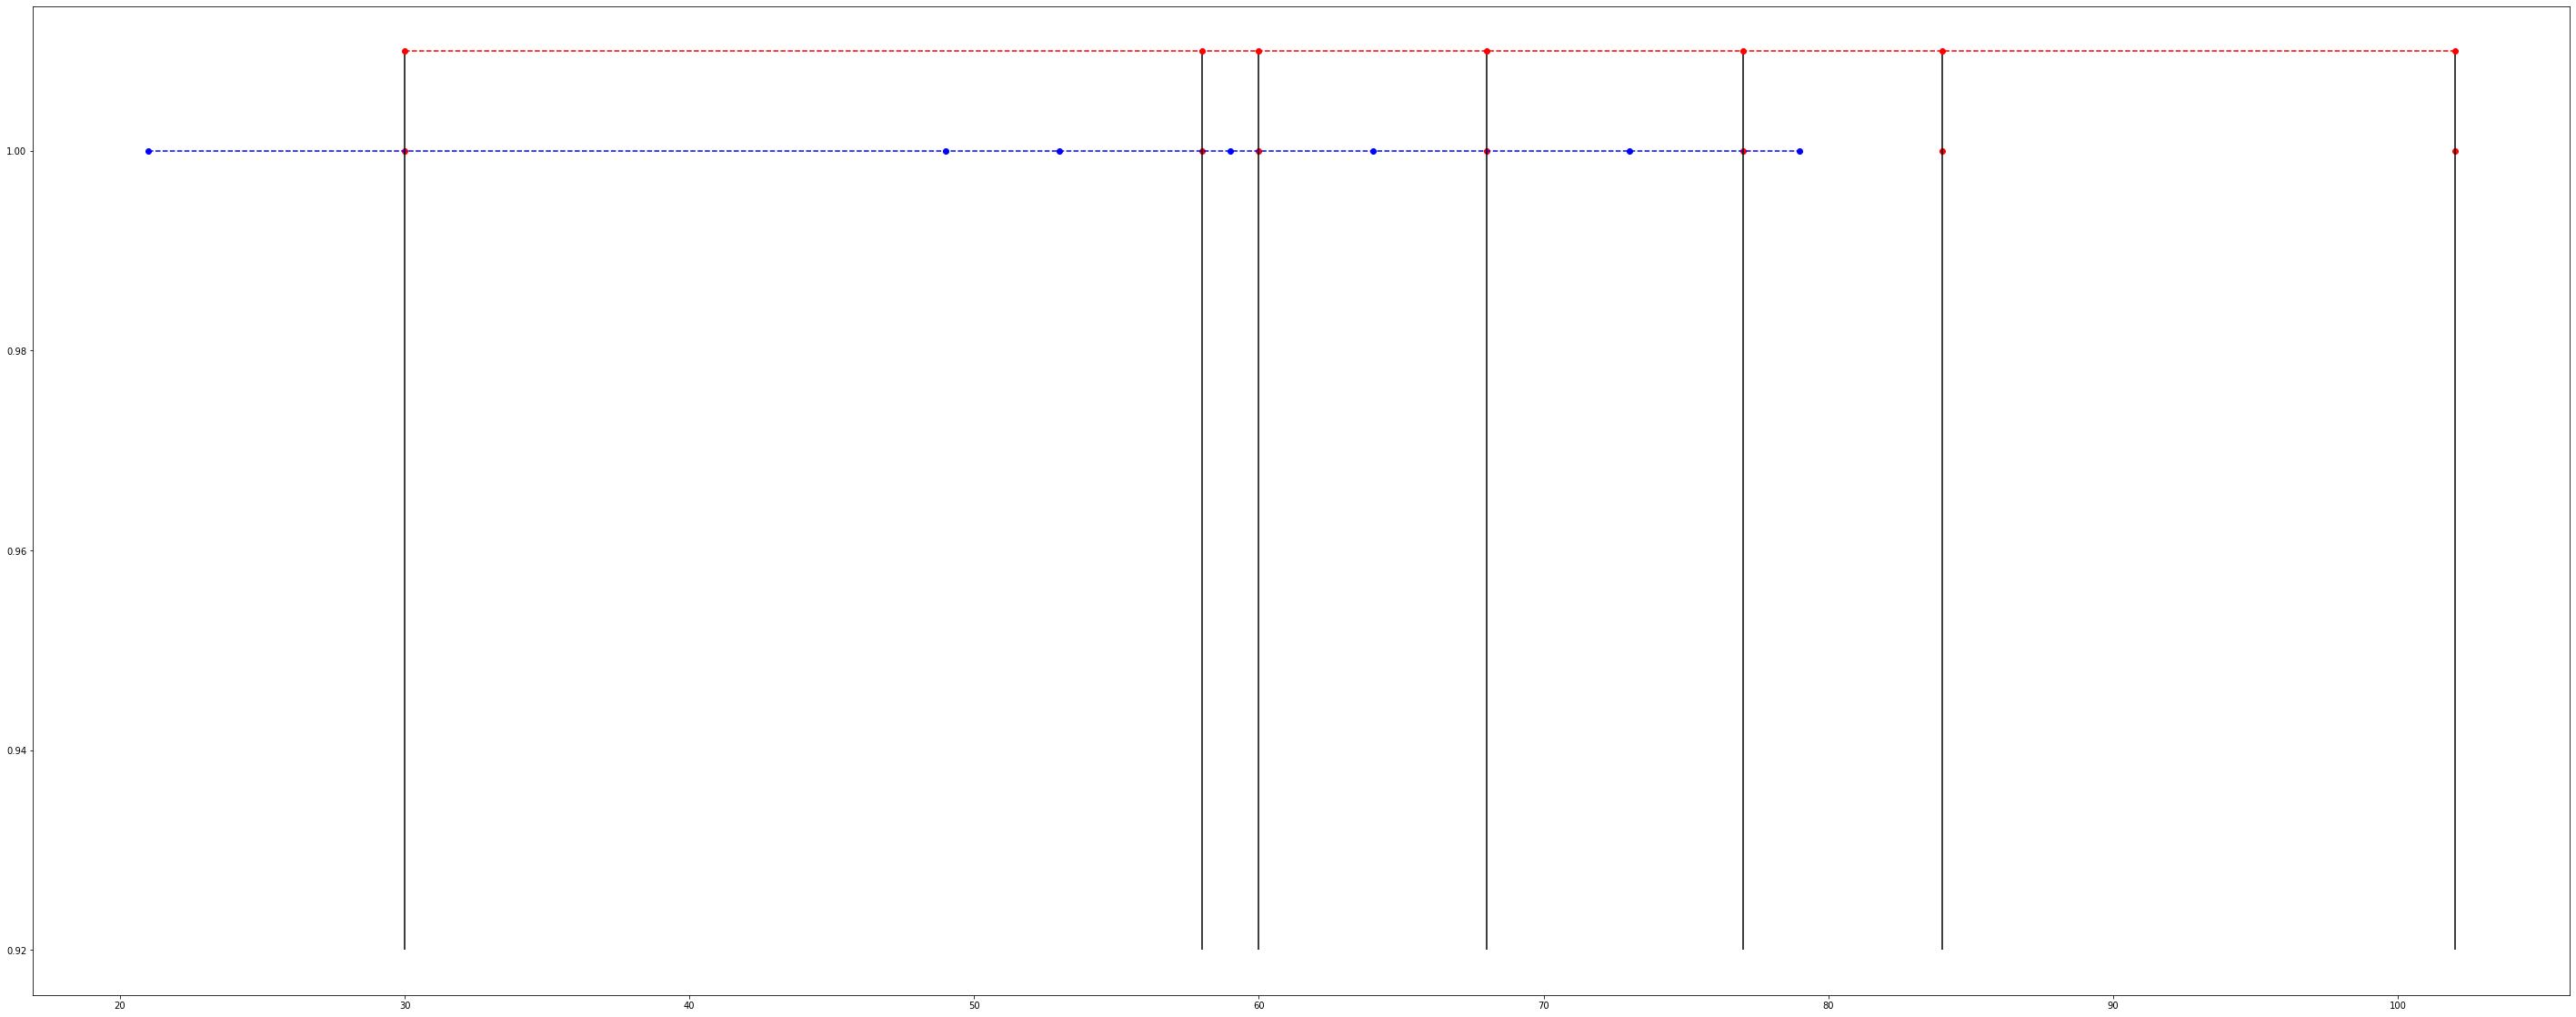

In [277]:
#@title Grafico

fig, ax = plt.subplots(figsize=(50,20))

x = dataFrame["tiempo Llegada Usuario"]
y = np.ones(len(x))
ax.plot(x, y,linestyle='--', marker='o', color='b')

ymin, ymax = ax.get_ylim()


x = dataFrame["tiempo Usuario sale Cajero"]
y = np.ones(len(x))*1.01

for i in range(len(x)):
    ax.vlines(x[i], 0.92, y[i])
    
ax.plot(x, y,linestyle='--', marker='o', color='r')


x = dataFrame["tiempo Usuario sale Cajero"]
y = np.ones(len(x))

ax.scatter(x, y,marker='o', color='r')
plt.show()